## - Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1- Brute-Force Matcher with ORB

### 1- Loading Images

In [2]:
img1 = cv2.imread('images/box.png',0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png',0) # trainImage

### 2- ORB Detector

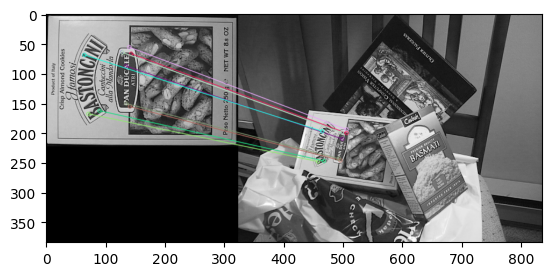

In [3]:
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1,des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.show()

## 2- Brute-Force with SIFT

### 1- Loading Images

In [4]:
img1 = cv2.imread('images/box.png', 0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png', 0) # trainImage

### 2- SIFT Detector

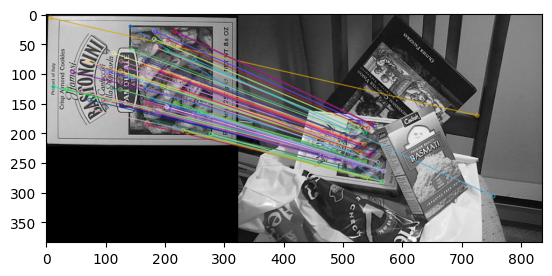

In [5]:
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.show()

## - Example

(<Axes: title={'center': 'With Ratio Test'}>,
 Text(0.5, 1.0, 'With Ratio Test'))

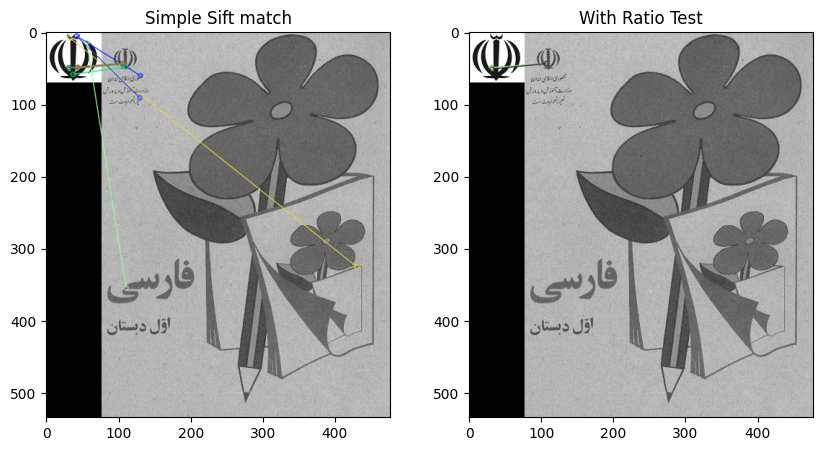

In [7]:
img1 = cv2.imread('images/arm.jpg', 0)   # queryImage
img2 = cv2.imread('images/ketab.jpg', 0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches
img4 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(img3, cmap='gray'),plt.title('Simple Sift match')
plt.subplot(122),plt.imshow(img4, cmap='gray'),plt.title('With Ratio Test')

## 3- FLANN Matcher

- Fast Library for Approximate Nearest Neighbor

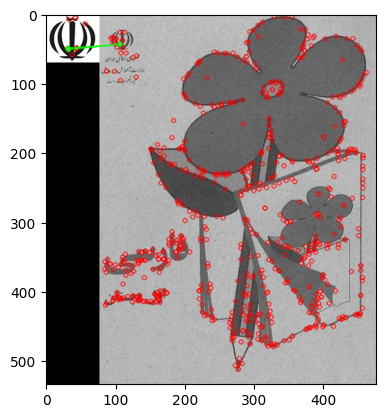

In [10]:
img1 = cv2.imread('images/arm.jpg', 0)
img2 = cv2.imread('images/ketab.jpg', 0) 

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,)
plt.show()

Read more: 
* [RANSAC](https://opencv.org/evaluating-opencvs-new-ransacs/)